In [1]:
import pandas as pd
import numpy as np
import pickle
import os
from utils.config_loader import load_config
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from processing.preprocessing_real import preprocess_real_data

config = load_config("./config/params.yaml")

In [2]:
preprocess_real_data(config)

In [5]:
with h5py.File("/home/samuelr/projects/WindViViT/project/data/processed/real_data.hdf5", 'r') as file:
    print(file.keys())

<KeysViewHDF5 ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011']>


## Analisis

In [11]:
# Set paths
real_data_path = os.path.join(config['global']['path'], config['global']['real_data_path'])
reanalysis_data_path = os.path.join(config['global']['path'], config['global']['processed_data_path'], 'data.hdf5')
constants_path = os.path.join(config['global']['path'], config['global']['constants_path'])

# Get climatologies
climatologies_path = os.path.join(constants_path, 'climatologies.pickle')
with open(climatologies_path, 'rb') as file:
    climatologies = pickle.load(file)["surface_climatologies"]

# Get index of lon and lat for each data point
longitudes = np.load(os.path.join(constants_path, 'longitude.npy'))
latitudes = np.load(os.path.join(constants_path, 'latitude.npy'))


pena_lat = config["locations"]["pena"]["latitude"]
pena_lon = config["locations"]["pena"]["longitude"]

jara_lat = config["locations"]["jara"]["latitude"]
jara_lon = config["locations"]["jara"]["longitude"]

minon_lat = config["locations"]["minon"]["latitude"]
minon_lon = config["locations"]["minon"]["longitude"]

pena_lat_idx = np.where(latitudes == pena_lat)[0][0]
pena_lon_idx = np.where(longitudes == pena_lon)[0][0]

jara_lat_idx = np.where(latitudes == jara_lat)[0][0]
jara_lon_idx = np.where(longitudes == jara_lon)[0][0]

minon_lat_idx = np.where(latitudes == minon_lat)[0][0]
minon_lon_idx = np.where(longitudes == minon_lon)[0][0]

var_names = config["preprocessing"]["surface_var_names"][1:]
u10_idx = var_names.index("u10")
v10_idx = var_names.index("v10")

In [12]:
data_path = os.path.join(config['global']['path'], config['global']['processed_data_path'], 'data.hdf5')

pena_rea_list = []
jara_rea_list = []
minon_rea_list = []

with h5py.File(data_path, 'r') as file:
    for year in range(2003, 2012): 
        year_str = str(year)
        if year_str in file.keys():
            pena_rea_data = file[year_str]['surface']['data'][:, pena_lat_idx, pena_lon_idx, u10_idx:v10_idx+1]
            jara_rea_data = file[year_str]['surface']['data'][:, jara_lat_idx, jara_lon_idx, u10_idx:v10_idx+1]
            minon_rea_data = file[year_str]['surface']['data'][:, minon_lat_idx, minon_lon_idx, u10_idx:v10_idx+1]

            pena_rea_list.append(pena_rea_data)
            jara_rea_list.append(jara_rea_data)
            minon_rea_list.append(minon_rea_data)

pena_rea = np.concatenate(pena_rea_list, axis=0)
jara_rea = np.concatenate(jara_rea_list, axis=0)
minon_rea = np.concatenate(minon_rea_list, axis=0)

date_range = pd.date_range(start='2003-01-01', end='2011-12-31 23:00:00', freq='H')

# Crear DataFrames de los arrays de NumPy para 2008
jara_rea_df = pd.DataFrame(jara_rea, columns=['U_rea', 'V_rea'], index=date_range)
mnon_rea_df = pd.DataFrame(minon_rea, columns=['U_rea', 'V_rea'], index=date_range)
pena_rea_df = pd.DataFrame(pena_rea, columns=['U_rea', 'V_rea'], index=date_range)


/tmp/ipykernel_1398990/2883659021.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start='2003-01-01', end='2011-12-31 23:00:00', freq='H')


/home/samuelr/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/samuelr/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/samuelr/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/samuelr/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

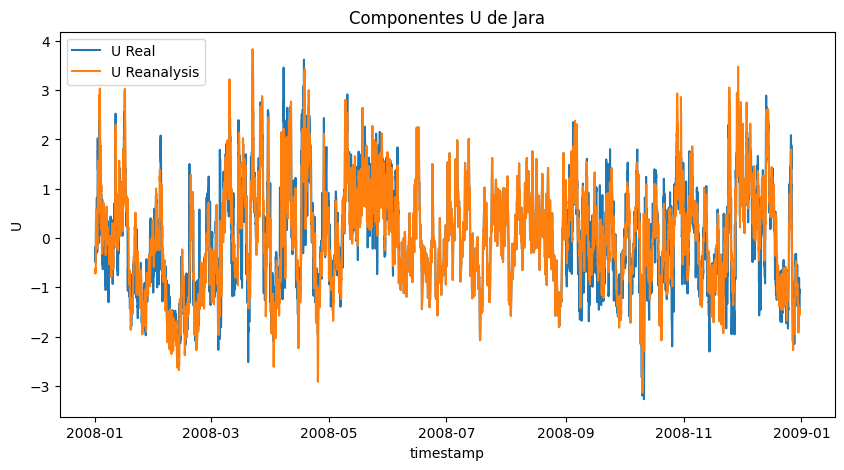

/home/samuelr/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/samuelr/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/samuelr/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/samuelr/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

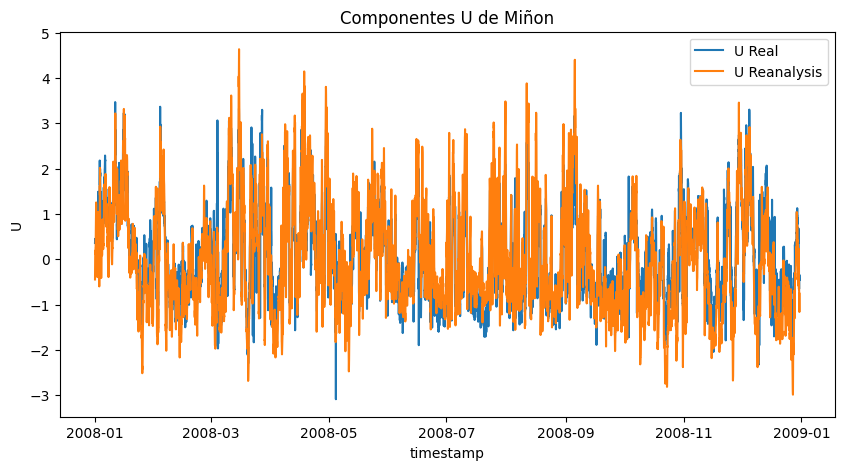

/home/samuelr/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/samuelr/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/samuelr/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/samuelr/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

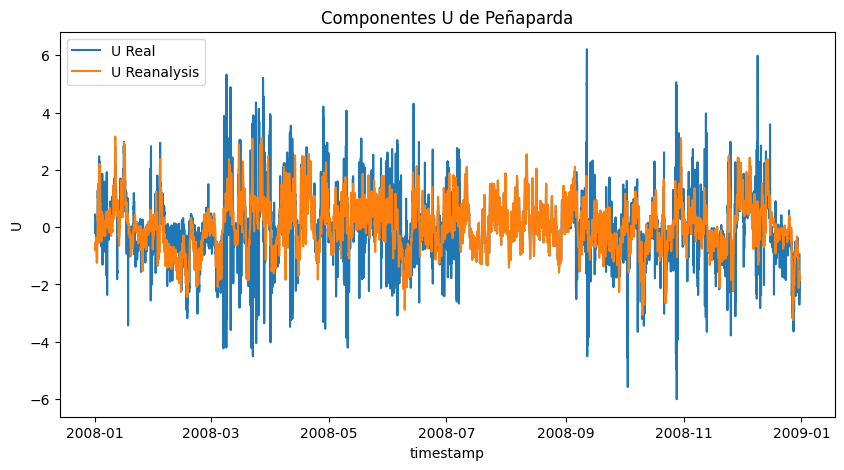

In [13]:
merged_jara = pd.merge(jara_rea_df, jara, left_index=True, right_on='timestamp', how='inner')
merged_minon = pd.merge(mnon_rea_df, minon, left_index=True, right_on='timestamp', how='inner')
merged_pena = pd.merge(pena_rea_df, pena, left_index=True, right_on='timestamp', how='inner')

merged_jara = merged_jara[['U_rea', 'V_rea', 'U', 'V']]
merged_minon = merged_minon[['U_rea', 'V_rea', 'U', 'V']]
merged_pena = merged_pena[['U_rea', 'V_rea', 'U', 'V']]

merged_minon = merged_minon.loc[merged_minon.index >= '2008-01-01']
merged_minon = merged_minon.loc[merged_minon.index <= '2008-12-31']

merged_jara = merged_jara.loc[merged_jara.index >= '2008-01-01']
merged_jara = merged_jara.loc[merged_jara.index <= '2008-12-31']

merged_pena = merged_pena.loc[merged_pena.index >= '2008-01-01']
merged_pena = merged_pena.loc[merged_pena.index <= '2008-12-31']

# Crear gráficos de líneas para cada DataFrame
def plot_components(df, title):
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df, x="timestamp", y="U", label='U Real')
    sns.lineplot(data=df, x="timestamp", y="U_rea", label='U Reanalysis')
    plt.title(title)
    plt.legend()
    plt.show()

plot_components(merged_jara, 'Componentes U de Jara')
plot_components(merged_minon, 'Componentes U de Miñon')
plot_components(merged_pena, 'Componentes U de Peñaparda')


In [14]:
# Calcular la correlación entre U y U_rea, y entre V y V_rea en merged_jara
correlation_u_jara = merged_jara['U'].corr(merged_jara['U_rea'])
correlation_v_jara = merged_jara['V'].corr(merged_jara['V_rea'])

# Calcular la correlación en merged_minon
correlation_u_minon = merged_minon['U'].corr(merged_minon['U_rea'])
correlation_v_minon = merged_minon['V'].corr(merged_minon['V_rea'])

# Calcular la correlación en merged_pena
correlation_u_pena = merged_pena['U'].corr(merged_pena['U_rea'])
correlation_v_pena = merged_pena['V'].corr(merged_pena['V_rea'])

# Imprimir los resultados
print("Correlación de U y U_rea en Jara:", correlation_u_jara)
print("Correlación de V y V_rea en Jara:", correlation_v_jara)
print("Correlación de U y U_rea en Miñon:", correlation_u_minon)
print("Correlación de V y V_rea en Miñon:", correlation_v_minon)
print("Correlación de U y U_rea en Peñaparda:", correlation_u_pena)
print("Correlación de V y V_rea en Peñaparda:", correlation_v_pena)

Correlación de U y U_rea en Jara: 0.9087341649376861
Correlación de V y V_rea en Jara: 0.8883811799914402
Correlación de U y U_rea en Miñon: 0.8661705544770096
Correlación de V y V_rea en Miñon: 0.8457280121666931
Correlación de U y U_rea en Peñaparda: 0.6586537367149468
Correlación de V y V_rea en Peñaparda: 0.744589935887409


## DataLoader

In [1]:
from torch.utils.data import DataLoader
from utils.config_loader import load_config
import os
from torch.utils.data import Dataset

import torch
import itertools
import h5py
import torch

config = load_config("./config/params.yaml")

In [2]:
class HDF5CustomDataset(Dataset):
    """
    Custom dataset for handling data stored in an HDF5 file.
    This version allows specifying which years to include and handles varying lengths due to leap years.
    """

    def __init__(self, hdf5_path, sequence_length, years=None):
        self.hdf5_path = hdf5_path
        self.sequence_length = sequence_length

        # Open the HDF5 file and get the list of years, filtered by the ones provided if any
        with h5py.File(self.hdf5_path, 'r') as file:
            self.years = years

            # Calculate lengths per year
            self.lengths_per_year = [file[year]['upper']['data'].shape[0] -
                                     (self.sequence_length + 1) for i, year in enumerate(self.years)]

        # Calculate the total length
        self.total_length = sum(self.lengths_per_year)

        # Pre-calculate the cumulative sum of lengths to help with index mapping
        self.cumulative_lengths = [
            0] + list(itertools.accumulate(self.lengths_per_year))

    def __len__(self):
        return self.total_length

    def __getitem__(self, idx):
        # Find which year this idx falls into, adjusted for sequence length
        year_idx = next(i for i, total in enumerate(self.cumulative_lengths) if idx < total) - 1
        within_year_idx = idx - self.cumulative_lengths[year_idx]

        # Open the HDF5 file and extract the sequences and label
        with h5py.File(self.hdf5_path, 'r') as file:
            year_key = self.years[year_idx]

            surface_sequence = file[year_key]['surface']['data'][within_year_idx: within_year_idx + self.sequence_length]
            surface_label = file[year_key]['surface']['data'][within_year_idx + 1: within_year_idx + self.sequence_length + 1]

        # Convert to torch tensors
        data = {
            'surface': torch.from_numpy(surface_sequence).float(),
            'surface_label': torch.from_numpy(surface_label).float()
        }
        return data

In [3]:
# Extract training parameters from the config
sequence_length = config['train']['sequence_length']
batch_size = config['train']['batch_size']
learning_rate = config['train']['learning_rate']
epochs = config['train']['epochs']
data_path = os.path.join(
    config['global']['path'], config['global']['processed_data_path'], 'data.hdf5')
train_split = config['train']['train_split']
val_split = config['train']['val_split']
prefetch_factor = config['train']['prefetch']
workers = config['train']['workers']

# Convert the split years into strings
train_split = [str(year) for group in train_split for year in range(group[0], group[-1] + 1)
                ] if len(train_split) > 1 else [str(train_split[0])]
val_split = [str(year) for year in range(val_split[0], val_split[-1] + 1)] if len(val_split) > 1 else [str(val_split[0])]

# Create dataset and dataloader for training and validation
train_dataset = HDF5CustomDataset(
    hdf5_path=data_path, sequence_length=sequence_length, years=train_split)

val_dataset = HDF5CustomDataset(
    hdf5_path=data_path, sequence_length=sequence_length, years=val_split)

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=workers,
    prefetch_factor=prefetch_factor,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=workers,
    prefetch_factor=prefetch_factor,
    pin_memory=True  # ! Check
)

In [7]:
print(train_split)
print(val_split)

['1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
['2010']


In [17]:
print(len(train_dataset))
print(len(val_dataset)) 
print(len(train_loader))
print(len(val_loader))

print(len(train_dataset)/len(val_dataset))
print(len(train_loader)/len(val_loader))

print(len(train_split))

375525
8727
5868
137
43.03025094534204
42.832116788321166
43
